## Preprocessing

In [1]:
# variables that are dropped
from helper_functions import format_variables, read_data

data_df = read_data()

to_filter = ["id", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

/Users/aymanehachcham/miniconda3/envs/case_s1/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [2]:
data_df

,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age
0,2006-10-25 15:03:29,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,42
1,2006-08-28 17:04:07,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,53
2,2006-06-04 14:31:14,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,46
3,2006-10-13 14:50:56,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,34
4,2006-08-12 16:54:45,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11 12:02:18,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,52
14827,2006-07-11 15:09:36,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,55
14828,2006-09-28 10:59:45,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,61
14829,2006-04-30 13:29:15,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,44


In [4]:
# Categorical features
cat_feat_list

['bundesland',
 'befinden',
 'geschlecht',
 'raucher',
 'blutzucker_bekannt',
 'cholesterin_bekannt',
 'in_behandlung']

In [5]:
# Extract the month and the day from the zeit variable:
import pandas as pd

data_df["zeit"] = pd.to_datetime(data_df["zeit"])
data_df["month"] = data_df["zeit"].dt.month
data_df["day"] = data_df["zeit"].dt.day

data_df

,zeit,bundesland,befinden,geschlecht,raucher,blutzucker_bekannt,cholesterin_bekannt,in_behandlung,schaetzwert_bp_sys,schaetzwert_by_dia,messwert_bp_sys,messwert_bp_dia,age,month,day
0,2006-10-25 15:03:29,Steiermark,2,f,False,False,False,False,120.0,80.0,123.0,86.0,42,10,25
1,2006-08-28 17:04:07,Steiermark,1,f,False,False,False,False,150.0,80.0,162.0,86.0,53,8,28
2,2006-06-04 14:31:14,Steiermark,2,m,False,False,False,False,135.0,70.0,121.0,66.0,46,6,4
3,2006-10-13 14:50:56,Steiermark,5,f,False,True,True,False,120.0,80.0,122.0,70.0,34,10,13
4,2006-08-12 16:54:45,Steiermark,1,f,False,False,True,False,110.0,80.0,110.0,75.0,40,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,2006-05-11 12:02:18,Steiermark,2,m,False,False,True,False,150.0,60.0,116.0,80.0,52,5,11
14827,2006-07-11 15:09:36,Steiermark,1,m,False,True,True,True,120.0,80.0,138.0,84.0,55,7,11
14828,2006-09-28 10:59:45,Steiermark,2,f,False,True,True,True,140.0,85.0,116.0,62.0,61,9,28
14829,2006-04-30 13:29:15,Steiermark,1,m,False,False,False,False,120.0,70.0,113.0,88.0,44,4,30


<Axes: xlabel='month', ylabel='messwert_bp_sys'>

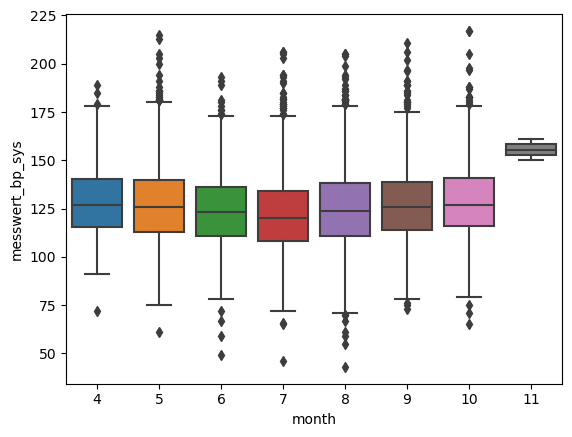

In [6]:
# Check the relationship between month and messwert_bp_sys:
import seaborn as sns

sns.boxplot(x="month", y="messwert_bp_sys", data=data_df)

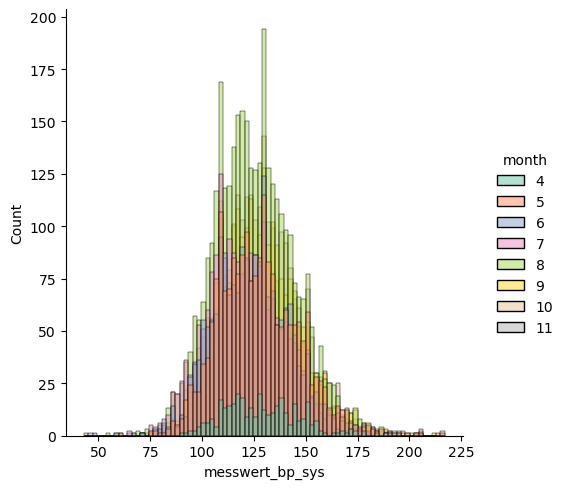

In [13]:
# change the hue color for the plot:
sns.displot(data_df, x="messwert_bp_sys", hue="month", kind="hist", fill=True, palette="Set2")